In [1]:
import os
import torch
import gc
import logging

gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()        
    torch.cuda.ipc_collect()


try:
    %run setup_paths
except:
    %run notebooks/setup_paths
    

logging.basicConfig(
    level=logging.INFO,  # or DEBUG, WARNING, etc.
    format='%(asctime)s - %(levelname)s - %(message)s',
    stream=sys.stdout
)

logging.info(f"current dir: {os.getcwd()}")

2025-10-02 20:32:32,881 - INFO - current dir: c:\Projects\scmsim


## Fetch and observe the data
- After it was generated CausalSim.MovieLens1M.0.MF40 was added to configs/config.yaml
- The .0 - is because it was trained on the sample-set 0

In [6]:
%run src/utils
%run src/loaders

cfg = read_cfg('configs/config.yaml')
paths = PathProvider(cfg['paths']['results'], cfg['paths']['products'])
uidata = MovieLensData(get_uidata_loader(cfg, 'CausalSim.MovieLens1M.0.MF40'))
uidata.ratings

2025-10-02 20:33:09,502 - INFO - loading ratings


,user_id,item_id,watched,timestamp
0,1,1,1.0,0.158135
1,1,34,1.0,0.953114
2,1,57,1.0,1.175028
3,1,268,1.0,1.789184
4,1,296,1.0,0.328906
...,...,...,...,...
1050442,6040,3819,1.0,0.142307
1050443,6040,3858,1.0,0.821029
1050444,6040,3868,1.0,0.094026
1050445,6040,3875,1.0,0.474089


## Generate estimations on top of trained models
- IPWPaeams(clipping, stabalized)
- (the last setting is stabalized with clipping=1.0 - which sets a weight of 1 to each sample.)

In [2]:
import pandas as pd
pd.read_csv(paths.get_product_csv('CausalSim.MovieLens1M.MF40/gt.filtered.8'))

NameError: name 'paths' is not defined

In [4]:

%run src/estimators
%run src/pipeline
%run src/estimators

ground_truth_name = 'CausalSim.MovieLens1M.MF40/gt.filtered.8'
ipw_params = [IPWParams(0, False), IPWParams(0, True), IPWParams(0.2, True), IPWParams(1, True),
             IPWParams(0, False, False), IPWParams(0, True,False), IPWParams(0.2, True,False), IPWParams(1, True,False)]

for model_name in ['MF30', 'MF50', 'MF60']:
    model = load_model(paths, uidata.name(), model_name)
    ipwe = MFIPWEstimator(model_name, model, ipw_params)    
    ## reset_ids mean we re-match the item-ids from the title name 
    create_estimations(paths, uidata, f'{model_name}.IPW', ground_truth_name, ipwe, reset_ids=False)
    create_estimations(paths, uidata, f'{model_name}.CosSim' , ground_truth_name, CosineSimilarityEstimator(model_name, model), reset_ids=False)
    #create_estimations(paths, uidata, f'{model_name}.Gate' , ground_truth_name, GateEstimator(model_name, model), reset_ids=False)



2025-09-30 09:33:06,375 - INFO - loading model MF30 (version 0) at results\CausalSim.MovieLens1M.0.MF40\models\MF30.0\weights.pt


C:\Projects\scmsim\src\loaders.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_path)


2025-09-30 09:33:06,658 - INFO - processing: 0:6212 / 6212
2025-09-30 09:33:23,815 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF30.IPW
2025-09-30 09:33:24,270 - INFO - processing: 0:6212 / 6212
2025-09-30 09:33:24,305 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF30.CosSim
2025-09-30 09:33:24,399 - INFO - loading model MF50 (version 0) at results\CausalSim.MovieLens1M.0.MF40\models\MF50.0\weights.pt


C:\Projects\scmsim\src\loaders.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_path)


2025-09-30 09:33:24,623 - INFO - processing: 0:6212 / 6212
2025-09-30 09:33:41,709 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF50.IPW
2025-09-30 09:33:42,126 - INFO - processing: 0:6212 / 6212
2025-09-30 09:33:42,143 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF50.CosSim
2025-09-30 09:33:42,230 - INFO - loading model MF60 (version 0) at results\CausalSim.MovieLens1M.0.MF40\models\MF60.0\weights.pt


C:\Projects\scmsim\src\loaders.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_path)


2025-09-30 09:33:42,890 - INFO - processing: 0:6212 / 6212
2025-09-30 09:33:59,767 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF60.IPW
2025-09-30 09:34:00,174 - INFO - processing: 0:6212 / 6212
2025-09-30 09:34:00,191 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF60.CosSim


## Generate basic estimations

In [5]:
basee = BasicEstimator()
create_estimations(paths, uidata, 'Basic' , ground_truth_name, basee)


2025-09-30 09:34:00,479 - INFO - processing: 0:6212 / 6212
2025-09-30 09:34:04,012 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\Basic


,CORR,LIFT,SATE,treatment_idx,resp_idx
0,-0.027446,2.415570,0.049250,1254,1515
1,0.338245,3.062363,0.066917,166,1515
2,-0.070136,1.330297,0.164616,1254,648
3,0.437892,1.382588,0.285350,1197,648
4,0.040429,1.952166,0.472681,376,648
...,...,...,...,...,...
6207,-0.137752,1.780210,0.337812,707,1198
6208,-0.287164,2.185692,0.054795,1213,1753
6209,0.008464,1.985557,0.163326,1114,292
6210,-0.075240,1.746397,0.071957,695,7


In [6]:
## Use ground-truth propensity

In [7]:
for model_name in ['MF40']:
    model = load_model(paths, 'MovieLens1M', model_name)
    ipwe = MFIPWEstimator("gt", model, ipw_params)    
    ## reset_ids mean we re-match the item-ids from the title name 
    create_estimations(paths, uidata, f'{model_name}.IPW', ground_truth_name, ipwe, reset_ids=False)
    #create_estimations(paths, uidata, f'{model_name}.CosSim' , ground_truth_name, CosineSimilarityEstimator(model_name, model), reset_ids=False)


2025-09-30 09:34:04,278 - INFO - loading model MF40 (version 0) at results\MovieLens1M\models\MF40.0\weights.pt


C:\Projects\scmsim\src\loaders.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_path)


2025-09-30 09:34:04,671 - INFO - processing: 0:6212 / 6212
2025-09-30 09:34:21,390 - INFO - saving estimations at results\CausalSim.MovieLens1M.0.MF40\estimations\CausalSim.MovieLens1M.MF40.gt.filtered.8\MF40.IPW


## Method Comparison
- MF30.IPW - is regular IPW on top of MF30 model
- MF30.IPW.s - is stabilized IPW on top of MF30 model
- MF60.IPWs.clp0.2.s is stabilized IPW with clipping=0.2 on top of MF60 model

In [8]:
%run src/pipeline
get_sim_scores(paths, uidata, ground_truth_name)

,name,mse,corr,mse_pos,mse_zero
0,CORR,0.028269687241955218,0.307178,0.02075272329486466,0.02886455901778521
1,LIFT,10.638350062650803,0.424369,52.018035459608654,7.979437813865753
2,SATE,0.04694503574515626,0.332264,0.05154356699344777,0.046007524747690216
3,MF30.CosSim,0.054627709371841145,0.439403,0.14132971476240735,0.04660006495155225
4,MF30.IPW.t,0.0028342109295145424,0.454018,0.007606901681243696,0.002621308488496822
5,MF30.IPW.s.t,0.003602868921316101,0.479791,0.003991880663756964,0.0036086862375916203
6,MF30.IPW.clp0.2.s.t,0.0077771245549460855,0.537103,0.006864730964431536,0.0075403687552247824
7,MF30.IPW.clp1.s.t,0.01243751945755239,0.518965,0.012388528812999204,0.011981561005725287
8,MF30.IPW,0.004117924246521198,0.412959,0.007495855751080505,0.004024363675765478
9,MF30.IPW.s,0.006048798166323619,0.414381,0.004066884136883695,0.006295918936511242


In [24]:
%run src/pipeline
ground_truth_name = 'CausalSim.MovieLens1M.MF40/gt.filtered.8'
cdf, _ = get_enriched_estimates(paths, uidata, ground_truth_name)
cdf.sort_values(by="ate", ascending=False)
cdf["causal_effect"] = cdf["causal_effect"] / 10.0

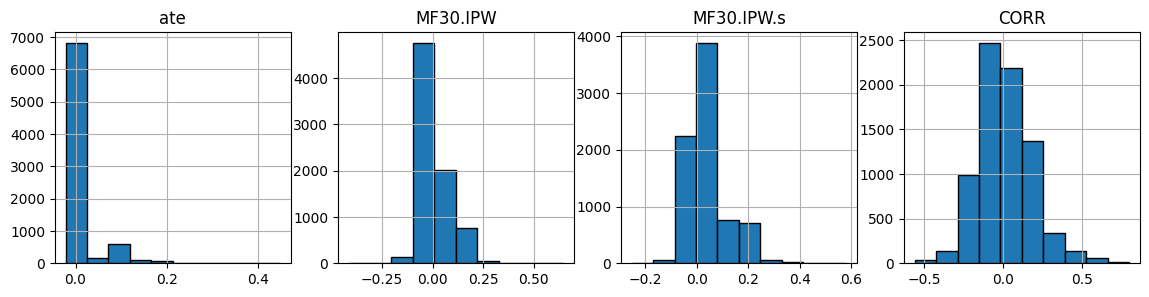

In [25]:
import matplotlib.pyplot as plt

idx = 1
plt.figure(figsize=(14, 3))
for col in ['ate','MF30.IPW', 'MF30.IPW.s', 'CORR']:
    plt.subplot(1, 4, idx)
    plt.title(col)
    cdf[col].hist(bins=10, edgecolor='black')
    idx += 1

In [26]:

cdf.sort_values(by="ate", ascending=False)[["ate","MF30.IPW","MF30.IPW.s","MF30.CosSim","gt.IPW", "gt.IPW.s","CORR"]].head(30)
#cdf[cdf["ate"] > 0.2][["ate","MF30.IPW","MF30.IPW.s","gt.IPW", "gt.IPW.s","CORR"]]

,ate,MF30.IPW,MF30.IPW.s,MF30.CosSim,gt.IPW,gt.IPW.s,CORR
2024,0.448841,0.224737,0.327001,0.390543,0.596002,0.372522,0.669923
7373,0.439404,0.308177,0.580066,0.891705,3.120990,0.711354,0.632181
6965,0.424007,0.382862,0.486402,0.615471,0.709409,0.621488,0.486523
6893,0.367053,0.146205,0.369308,0.449171,0.127212,0.283475,0.630607
7520,0.354967,0.256460,0.264928,0.553336,0.240306,0.259660,0.282911
6815,0.351821,0.269521,0.308549,0.855312,1.663231,0.390280,0.535597
1468,0.348675,0.147067,0.228865,0.534845,0.247706,0.199650,0.442961
4672,0.342053,0.384073,0.412363,0.649362,0.477633,0.411318,0.400246
7676,0.331457,0.179645,0.325875,0.754119,0.637821,0.358005,0.434568
7307,0.322351,0.278080,0.315005,0.228096,0.548799,0.259965,0.215862


In [27]:
aaa = pd.read_csv(paths.get_product_csv('CausalSim.MovieLens1M.MF40/gt.filtered.8'))

In [28]:
aaa[aaa["treatment_idx"]==1]


,idx,treatment_title,resp_title,sate,causal_effect,explanation,treatment_idx,resp_idx,ate


In [29]:
sim_uidata = MovieLensData(get_uidata_loader(cfg, 'CausalSim.MovieLens1M.0.MF40'))
ml_uidata = MovieLensData(get_uidata_loader(cfg, 'ml-1m'))



In [30]:

w0 = ml_uidata.get_watch_matrix()
w1 = sim_uidata.get_watch_matrix()
model_name = 'MF30'
model = load_model(paths, sim_uidata.name(), 'MF30')

2025-10-02 20:37:31,977 - INFO - loading ratings
2025-10-02 20:37:36,099 - INFO - loading ratings
2025-10-02 20:37:36,385 - INFO - loading model MF30 (version 0) at results\CausalSim.MovieLens1M.0.MF40\models\MF30.0\weights.pt


C:\Projects\scmsim\src\loaders.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_path)


In [31]:
tidx, ridx = 1-1, 1196-1

In [32]:
w0[:,tidx], w0[:,ridx]
torch.corrcoef(torch.stack([w0[:,tidx], w0[:,ridx]]))[0,1]

tensor(0.2543)

In [33]:
torch.corrcoef(torch.stack([w1[:,tidx], w1[:,ridx]]))[0,1]

tensor(0.2584)

In [34]:
%run src/estimators
%run src/pipeline

#ipwe = MFIPWEstimator(model_name, model, ipw_params)    
#ipwe.estimate(sim_uidata, torch.tensor([tidx]), torch.tensor([ridx]))

In [35]:
bins = np.arange(-0.1, 1.05, 0.1)
bins
#cdf[cdf["ate"] > 0.2][["x_bin","ate"]]

array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,
        1. ])

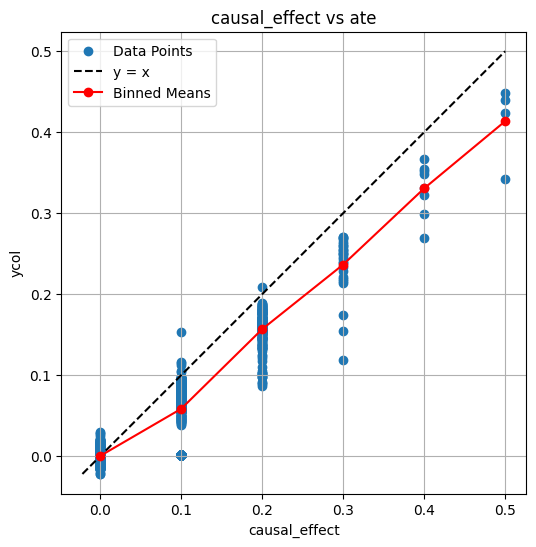

In [36]:
# Plotting
df = cdf
xcol = 'ate'
ycol = 'MF50.IPW.clp0.2.s'
ycol = 'MF30.IPW.s'

xcol = 'causal_effect'
ycol = 'ate'

plt.figure(figsize=(6, 6))
plt.scatter(df[xcol], df[ycol], label='Data Points')

# Add y = x line
lims = [
    np.min([df[xcol].min(), df[ycol].min()]),
    np.max([df[xcol].max(), df[ycol].max()])
]
plt.plot(lims, lims, 'k--', label='y = x')  # dashed black line

#########
bins = np.arange(0.05, 1.1, 0.1)
bins = np.insert(bins, 0, -np.inf)

# Bin and compute means
df['bin'] = pd.cut(df[xcol], bins=bins)
binned = df.groupby('bin').agg(
    x_mean=(xcol, 'mean'),
    y_mean=(ycol, 'mean')
).dropna().reset_index()

# Plot
#plt.figure(figsize=(6, 6))
#plt.scatter(df[xcol], df[ycol], alpha=0.6, label='Data Points')
#plt.plot([0, 1], [0, 1], 'k--', label='y = x')

# Plot binned means
plt.plot(binned['x_mean'], binned['y_mean'], 'o-', color='red', label='Binned Means')
########
plt.xlabel(xcol)
plt.ylabel('ycol')
plt.title(f'{xcol} vs {ycol}')
plt.legend()
plt.axis('equal')  # equal scaling
plt.grid(True)
plt.show()

In [ ]:
cdf